# Titanic: Machine Learning from Disaster

!["Untergang der Titanic", as conceived by Willy Stöwer, 1912](https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

This notebook's gonna teach you to use the basic data science stack for python: jupyter, numpy, matplotlib and sklearn.

## Part I: Jupyter notebooks recap

**The most important feature** of jupyter notebooks for this course: 
* if you're typing something, press `Tab` to see automatic suggestions, use arrow keys + enter to pick one.
* if you move your cursor inside some function and press `Tab`, you'll get a help window.

In [0]:
# run this first
import math

In [0]:
# Place your cursor at the end of the unfinished line below and press tab to
# find a function that computes arctangent from two parameters (should
# have 2 in it's name).
# Once you chose it, put an opening bracket character and press tab to
# see the docs.

math.a  # <---

## Part II: Loading data with Pandas

Pandas is a library that helps you load the data, prepare it and perform some lightweight analysis. The god object here is the `pandas.DataFrame` - a 2d table with batteries included. 

In the cell below we use it to read the data on the infamous titanic shipwreck.

__please keep running all the code cells as you read__

In [0]:
!wget https://github.com/yandexdataschool/MLatImperial2019/raw/master/01_lab/train.csv

In [0]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId') # this yields a pandas.DataFrame

In [0]:
# Selecting rows
head = data[:10]

head  #if you leave an expression at the end of a cell, jupyter will "display" it automatically

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* Sibsp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [0]:
# table dimensions
print("len(data) = ", len(data))
print("data.shape = ", data.shape)

len(data) =  891
data.shape =  (891, 11)


In [0]:
# select a single row
print(data.loc[4])

Survived                                               1
Pclass                                                 1
Name        Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                               female
Age                                                   35
SibSp                                                  1
Parch                                                  0
Ticket                                            113803
Fare                                                53.1
Cabin                                               C123
Embarked                                               S
Name: 4, dtype: object


In [0]:
# select a single column.
ages = data["Age"]
print(ages[:10])  # alternatively: data.Age

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64


In [0]:
# select several columns and rows at once
data.loc[5:10, ("Fare", "Pclass")]    # alternatively: data[["Fare","Pclass"]].loc[5:10]

,Fare,Pclass
PassengerId,,
5,8.0500,3
6,8.4583,3
7,51.8625,1
8,21.0750,3
9,11.1333,3
10,30.0708,2


### `loc` vs `iloc`

There are two ways of indexing the rows in pandas:
 *   by index column values (`PassengerId` in our case) – use `data.loc` for that
 *   by positional index - use `data.iloc` for that

Note that index column starts from 1, so positional index 0 will correspond to index column value 1, positional 1 to index column value 2, and so on:

In [0]:
print(data.index)
print('------')
print("data.iloc[0]:")
print(data.iloc[0])
print('------')
print("data.loc[1]:")
print(data.loc[1])

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)
------
data.iloc[0]:
Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object
------
data.loc[1]:
Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin            

### Your turn:


In [0]:
# select passengers number 13 and 666 - did they survive?

<YOUR CODE>

In [0]:
#### SOLUTION! ####

print(data.loc[[13, 666]].Survived)
# or:
# print(data.iloc[[13, 666]].Survived) # these are different passengers

data.loc[[13, 666]]
# or:
# data.iloc[[13, 666]]

PassengerId
13     0
666    0
Name: Survived, dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,NaN,S
666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.50,NaN,S


In [0]:
# compute the overall survival rate (what fraction of passengers survived the shipwreck)

<YOUR CODE>

In [0]:
#### SOLUTION! ####
print("survival rate is:", data.Survived.mean())

survival rate is: 0.3838383838383838


```

```

```

```

```

```

```

```

```

```

```

```

```

```



Pandas also has some basic data analysis tools. For one, you can quickly display statistical aggregates for each column using `.describe()`

In [0]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Some columns contain __NaN__ values - this means that there is no data there. For example, passenger `#5` has unknown age. To simplify the future data analysis, we'll replace NaN values by using pandas `fillna` function.

_Note: we do this so easily because it's a tutorial. In general, you think twice before you modify data like this._

In [0]:
data.iloc[5]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

In [0]:
data['Age'] = data['Age'].fillna(value=data['Age'].mean())
data['Fare'] = data['Fare'].fillna(value=data['Fare'].mean())

In [0]:
data.iloc[5]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                  29.6991
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

More pandas: 
* A neat [tutorial](http://pandas.pydata.org/) from pydata
* Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html), including this [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html#min)
* Bunch of cheat sheets awaits just one google query away from you (e.g. [basics](http://blog.yhat.com/static/img/datacamp-cheat.png), [combining datasets](https://pbs.twimg.com/media/C65MaMpVwAA3v0A.jpg) and so on). 

## Part III: Numpy and vectorized computing

Almost any machine learning model requires some computational heavy lifting usually involving linear algebra problems. Unfortunately, raw python is terrible at this because each operation is interpreted at runtime. 

So instead, we'll use `numpy` - a library that lets you run blazing fast computation with vectors, matrices and other tensors. Again, the god oject here is `numpy.ndarray`:

In [0]:
import numpy as np

a = np.array([1,2,3,4,5])
b = np.array([5,4,3,2,1])
print("a = ", a)
print("b = ", b)

# math and boolean operations can applied to each element of an array
print("a + 1 =", a + 1)
print("a * 2 =", a * 2)
print("a == 2", a == 2)
# ... or corresponding elements of two (or more) arrays
print("a + b =", a + b)
print("a * b =", a * b)

a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a + 1 = [2 3 4 5 6]
a * 2 = [ 2  4  6  8 10]
a == 2 [False  True False False False]
a + b = [6 6 6 6 6]
a * b = [5 8 9 8 5]


In [0]:
# Your turn: compute half-products of a and b elements (halves of products)
<YOUR CODE>

In [0]:
#### SOLUTION! ####
a * b / 2

array([2.5, 4. , 4.5, 4. , 2.5])

In [0]:
# compute elementwise quotient between squared a and (b plus 1)
<YOUR CODE>

In [0]:
#### SOLUTION! ####
a**2 / (b + 1)

array([ 0.16666667,  0.8       ,  2.25      ,  5.33333333, 12.5       ])

```

```

```

```

```

```

```

```

```

```

There's a number of functions to create arrays of zeros, ones, ascending/descending numbers etc.:

In [0]:
np.zeros(shape=(3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [0]:
np.ones(shape=(2, 5), dtype=np.bool)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [0]:
np.arange(3, 15, 2) # start, stop, step

array([ 3,  5,  7,  9, 11, 13])

In [0]:
np.linspace(0, 10, 11) # divide [0, 10] interval into 11 points

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [0]:
np.logspace(1, 10, 10, base=2, dtype=np.int64)

array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

You can easily reshape arrays:

In [0]:
np.arange(24).reshape(2, 3, 4)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

or add dimensions of size 1:

In [0]:
print(np.arange(3)[:, np.newaxis])
print('---')
print(np.arange(3)[np.newaxis, :])

[[0]
 [1]
 [2]]
---
[[0 1 2]]


Such dimensions are automatically broadcast when doing mathematical operations:

In [0]:
np.arange(3)[:, np.newaxis] + np.arange(3)[np.newaxis, :]

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

There is also a number of ways to stack arrays together:

In [0]:
matrix1 = np.arange(50).reshape(10, 5)
matrix2 = -np.arange(20).reshape(10, 2)

np.concatenate([matrix1, matrix2], axis=1)

array([[  0,   1,   2,   3,   4,   0,  -1],
       [  5,   6,   7,   8,   9,  -2,  -3],
       [ 10,  11,  12,  13,  14,  -4,  -5],
       [ 15,  16,  17,  18,  19,  -6,  -7],
       [ 20,  21,  22,  23,  24,  -8,  -9],
       [ 25,  26,  27,  28,  29, -10, -11],
       [ 30,  31,  32,  33,  34, -12, -13],
       [ 35,  36,  37,  38,  39, -14, -15],
       [ 40,  41,  42,  43,  44, -16, -17],
       [ 45,  46,  47,  48,  49, -18, -19]])

In [0]:
np.stack([matrix1[:,0], matrix2[:,0]], axis=1)

array([[  0,   0],
       [  5,  -2],
       [ 10,  -4],
       [ 15,  -6],
       [ 20,  -8],
       [ 25, -10],
       [ 30, -12],
       [ 35, -14],
       [ 40, -16],
       [ 45, -18]])

Any matrix can be transposed easily:

In [0]:
matrix2.T

array([[  0,  -2,  -4,  -6,  -8, -10, -12, -14, -16, -18],
       [ -1,  -3,  -5,  -7,  -9, -11, -13, -15, -17, -19]])

In [0]:
# Your turn: make a (7 x 5) matrix with e_ij = i
# (i - row number, j - column number)

<YOUR CODE>

In [0]:
#### SOLUTION! ####

# solution 1:
print(np.arange(7)[:,np.newaxis] * np.ones(shape=(7, 5)))

# solution 2:
print(np.stack([np.arange(7)] * 5, axis=1))

# Note the data type is different for the two solutions. Why is that?

[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6.]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]]


### How fast is it, harry?

![img](https://img.buzzfeed.com/buzzfeed-static/static/2015-11/6/7/enhanced/webdr10/enhanced-buzz-22847-1446811476-0.jpg)

Let's compare computation time for python and numpy
* Two arrays of 10^6 elements
 * first - from 0 to 1 000 000
 * second - from 99 to 1 000 099
 
* Computing:
 * elemwise sum
 * elemwise product
 * square root of first array
 * sum of all elements in the first array
 

In [0]:
%%time 
# ^-- this "magic" measures and prints cell computation time

# Option I: pure python
arr_1 = range(1000000)
arr_2 = range(99,1000099)


a_sum = []
a_prod = []
sqrt_a1 = []
for i in range(len(arr_1)):
    a_sum.append(arr_1[i]+arr_2[i])
    a_prod.append(arr_1[i]*arr_2[i])
    a_sum.append(arr_1[i]**0.5)
    
arr_1_sum = sum(arr_1)


CPU times: user 1.23 s, sys: 99.4 ms, total: 1.33 s
Wall time: 1.33 s


In [0]:
%%time

# Option II: start from python, convert to numpy
arr_1 = range(1000000)
arr_2 = range(99,1000099)

arr_1, arr_2 = np.array(arr_1) , np.array(arr_2)


a_sum = arr_1 + arr_2
a_prod = arr_1 * arr_2
sqrt_a1 = arr_1 ** .5
arr_1_sum = arr_1.sum()


CPU times: user 410 ms, sys: 135 ms, total: 546 ms
Wall time: 545 ms


In [0]:
%%time

# Option III: pure numpy
arr_1 = np.arange(1000000)
arr_2 = np.arange(99,1000099)

a_sum = arr_1 + arr_2
a_prod = arr_1 * arr_2
sqrt_a1 = arr_1 ** .5
arr_1_sum = arr_1.sum()


CPU times: user 84.2 ms, sys: 1.73 ms, total: 85.9 ms
Wall time: 89.9 ms


If you want more serious benchmarks, take a look at [this](http://brilliantlywrong.blogspot.ru/2015/01/benchmarks-of-speed-numpy-vs-all.html).

```

```

```

```

```

```

```

```

```

```

```

```

```

```

### Other numpy functions and features

There's also a bunch of pre-implemented operations including logarithms, trigonometry, vector/matrix products and aggregations.

In [0]:
a = np.array([1,2,3,4,5])
b = np.array([5,4,3,2,1])
print("numpy.sum(a) = ", np.sum(a))
print("numpy.mean(a) = ", np.mean(a))
print("numpy.min(a) = ",  np.min(a))
print("numpy.argmin(b) = ", np.argmin(b))  # index of minimal element
print("numpy.dot(a,b) = ", np.dot(a, b))      # dot product. Also used for matrix/tensor multiplication
print("numpy.unique(['male','male','female','female','male']) = ", np.unique(['male','male','female','female','male']))

# and tons of other stuff. see http://bit.ly/2u5q430 .

numpy.sum(a) =  15
numpy.mean(a) =  3.0
numpy.min(a) =  1
numpy.argmin(b) =  4
numpy.dot(a,b) =  35
numpy.unique(['male','male','female','female','male']) =  ['female' 'male']


The important part: all this functionality works with dataframes, as you can get their numpy representation with `.values` (most numpy functions will even work on pure pandas objects):

In [0]:
# calling np.max on a pure pandas column:
print("Max ticket price: ", np.max(data["Fare"]))

# calling np.argmax on a numpy representation of a pandas column
# to get its positional index:
print("\nThe guy who paid the most:\n", data.iloc[np.argmax(data["Fare"].values)])

Max ticket price:  512.3292

The guy who paid the most:
 Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                       35
SibSp                      0
Parch                      0
Ticket              PC 17755
Fare                 512.329
Cabin                    NaN
Embarked                   C
Name: 259, dtype: object


In [0]:
# your code: compute mean passenger age and the oldest guy on the ship
<YOUR CODE>

In [0]:
#### SOLUTION! ####
print("mean age is:", np.mean(data.Age))
print("\nOldest person on the ship:\n", data.iloc[np.argmax(data.Age.values)])

mean age is: 29.69911764705882

Oldest person on the ship:
 Survived                                       1
Pclass                                         1
Name        Barkworth, Mr. Algernon Henry Wilson
Sex                                         male
Age                                           80
SibSp                                          0
Parch                                          0
Ticket                                     27042
Fare                                          30
Cabin                                        A23
Embarked                                       S
Name: 631, dtype: object


In [0]:
print("Boolean operations")

print('a = ', a)
print('b = ', b)
print("a > 2", a > 2)
print("numpy.logical_not(a>2) = ", np.logical_not(a>2))
print("numpy.logical_and(a>2,b>2) = ", np.logical_and(a > 2,b > 2))
print("numpy.logical_or(a>2,b<3) = ", np.logical_or(a > 2, b < 3))

print("\n shortcuts")
print("~(a > 2) = ", ~(a > 2))                    #logical_not(a > 2)
print("(a > 2) & (b > 2) = ", (a > 2) & (b > 2))  #logical_and
print("(a > 2) | (b < 3) = ", (a > 2) | (b < 3))  #logical_or

Boolean operations
a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a > 2 [False False  True  True  True]
numpy.logical_not(a>2) =  [ True  True False False False]
numpy.logical_and(a>2,b>2) =  [False False  True False False]
numpy.logical_or(a>2,b<3) =  [False False  True  True  True]

 shortcuts
~(a > 2) =  [ True  True False False False]
(a > 2) & (b > 2) =  [False False  True False False]
(a > 2) | (b < 3) =  [False False  True  True  True]


Another numpy feature we'll need is indexing: selecting elements from an array. 
Aside from python indexes and slices (e.g. a[1:4]), numpy also allows you to select several elements at once.

In [0]:
a = np.array([0, 1, 4, 9, 16, 25])
ix = np.array([1,2,5])
print("a = ", a)
print("Select by element index")
print("a[[1,2,5]] = ", a[ix])

print("\nSelect by boolean mask")
print("a[a > 5] = ", a[a > 5])     # select all elements in a that are greater than 5
print("(a % 2 == 0) =", a % 2 == 0) # True for even, False for odd
print("a[a % 2 == 0] =", a[a % 2 == 0]) # select all elements in a that are even


print("data[(data['Age'] < 18) & (data['Sex'] == 'male')] = (below)") # select male children
data[(data['Age'] < 18) & (data['Sex'] == 'male')]

a =  [ 0  1  4  9 16 25]
Select by element index
a[[1,2,5]] =  [ 1  4 25]

Select by boolean mask
a[a > 5] =  [ 9 16 25]
(a % 2 == 0) = [ True False  True False  True False]
a[a % 2 == 0] = [ 0  4 16]
data[(data['Age'] < 18) & (data['Sex'] == 'male')] = (below)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S
126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
139,0,3,"Osen, Mr. Olaf Elon",male,16.00,0,0,7534,9.2167,NaN,S


### Your turn

Use numpy and pandas to answer a few questions about data

In [0]:
# who on average paid more for their ticket, men or women?

mean_fare_men = <YOUR CODE>
mean_fare_women = <YOUR CODE>

print(mean_fare_men, mean_fare_women)

In [0]:
#### SOLUTION! ####
mean_fare_men   = np.mean(data[data.Sex == 'male'  ].Fare)
mean_fare_women = np.mean(data[data.Sex == 'female'].Fare)

print(mean_fare_men, mean_fare_women)

25.523893414211443 44.47981783439491


In [0]:
# who is more likely to survive: a child (<18 yo) or an adult?

child_survival_rate = <YOUR CODE>
adult_survival_rate = <YOUR CODE>

print(child_survival_rate, adult_survival_rate)

In [0]:
#### SOLUTION! ####

# who is more likely to survive: a child (<18 yo) or an adult?

child_survival_rate = np.mean(data[data.Age <  18.].Survived)
adult_survival_rate = np.mean(data[data.Age >= 18.].Survived)

print(child_survival_rate, adult_survival_rate)

0.5398230088495575 0.36118251928020567


## Part IV: plots and matplotlib

Using python to visualize the data is covered by yet another library: `matplotlib`.

Just like python itself, matplotlib has an awesome tendency of keeping simple things simple while still allowing you to write complicated stuff with convenience (e.g. super-detailed plots or custom animations).

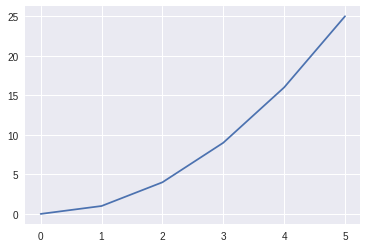

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  
# ^-- this "magic" selects specific matplotlib backend suitable for
# jupyter notebooks. For more info see:
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html#id1

# line plot
plt.plot([0,1,2,3,4,5],[0,1,4,9,16,25]);

x = [0 1 2 3 4]
x**2 = [ 0  1  4  9 16]
plotting x**2 vs x:


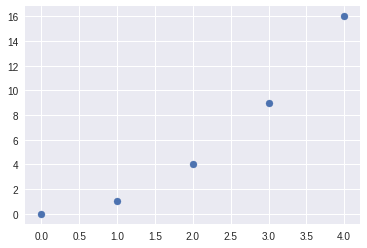

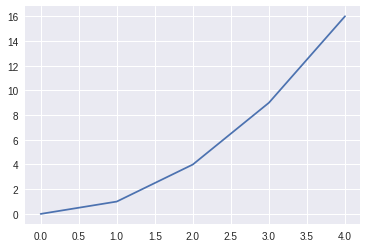

In [0]:
#scatter-plot
x = np.arange(5)
print("x =", x)
print("x**2 =", x**2)
print("plotting x**2 vs x:")
plt.scatter(x, x**2)

plt.show()  # show the first plot and begin drawing next one
plt.plot(x, x**2);

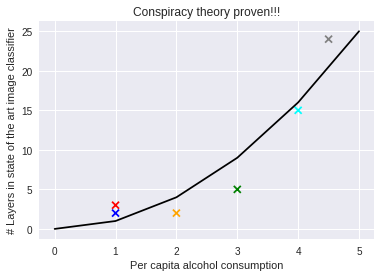

In [0]:
# draw a scatter plot with custom markers and colors
plt.scatter([1, 1, 2, 3, 4, 4.5], [3, 2, 2, 5, 15, 24],
            c=["red", "blue", "orange", "green", "cyan", "gray"],
            marker="x")

# without plt.show(), several plots will be drawn on top of one another
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25], c="black")

# adding more sugar
plt.title("Conspiracy theory proven!!!")
plt.xlabel("Per capita alcohol consumption")
plt.ylabel("# Layers in state of the art image classifier");

# fun with correlations: http://bit.ly/1FcNnWF

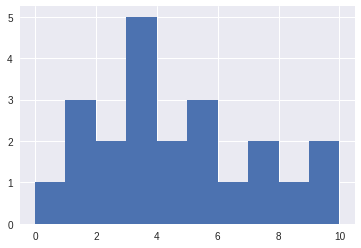

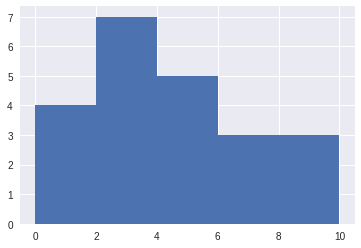

In [0]:
# histogram - showing data density
plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10])
plt.show()

plt.hist([0,1,1,1,2,2,3,3,3,3,3,4,4,5,5,5,6,7,7,8,9,10], bins=5);

In [0]:
# plot a histogram of age and a histogram of ticket fares on separate plots

<YOUR CODE>

#bonus: use tab to see if there is a way to draw a 2D histogram of age vs fare.

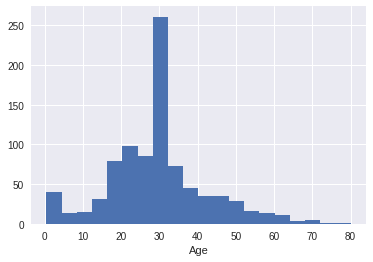

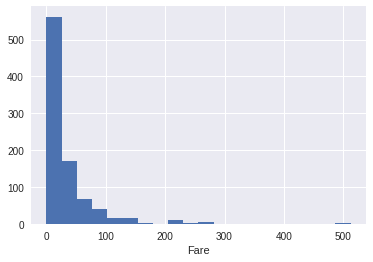

In [0]:
#### SOLUTION! ####
plt.hist(data.Age, bins=20)
plt.xlabel('Age')
plt.show();

plt.hist(data.Fare, bins=20)
plt.xlabel('Fare')
plt.show();

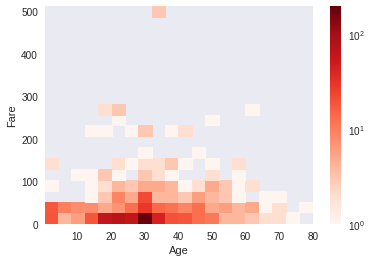

In [0]:
#### SOLUTION! ####

# import for log-Z axis tweaks:
import matplotlib.colors as colors

plt.hist2d(data.Age, data.Fare, bins=20,
           norm=colors.LogNorm(), cmap='Reds')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Fare');

In [0]:
# make a scatter plot of passenger age vs ticket fare

<YOUR CODE>

# kudos if you add separate colors for men and women

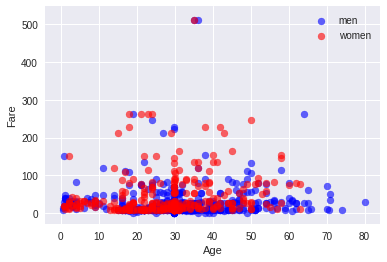

In [0]:
#### SOLUTION! ####
select_men = data.Sex == 'male'
plt.scatter(data.Age[select_men], data.Fare[select_men],
            alpha=0.6, label='men', c='b')
plt.scatter(data.Age[~select_men], data.Fare[~select_men],
            alpha=0.6, label='women', c='r')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Fare");

* Extended [tutorial](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html)
* A [cheat sheet](http://bit.ly/2koHxNF)
* Other libraries for more sophisticated stuff: [Seaborn](https://seaborn.pydata.org/), [Plotly](https://plot.ly/python/), and [Bokeh](https://bokeh.pydata.org/en/latest/)

## Part V (final): machine learning with scikit-learn

<img src='https://imgs.xkcd.com/comics/machine_learning.png' width=320px>

Scikit-learn is _the_ tool for simple machine learning pipelines. 

It's a single library that unites a whole bunch of models under the common interface:
* Create:__ `model = sklearn.whatever.ModelNameHere(parameters_if_any)`__
* Train:__ `model.fit(X,y)`__
* Predict:__ `model.predict(X_test)`__

It also contains utilities for feature extraction, quality estimation or cross-validation.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = data[["Fare", "SibSp"]].copy()
answers = data["Survived"]

model = KNeighborsClassifier(n_neighbors=100)
model.fit(features[:-100], answers[:-100])

test_predictions = model.predict(features[-100:])
print("Test accuracy:", accuracy_score(answers[-100:], test_predictions))

Test accuracy: 0.68


__Final quest:__ tune n_neighbors and add more features to achieve accuracy of at least 0.75


__Hint 1:__ for string features like "Sex" or "Embarked" you will have to compute some kind of numeric representation.
For example, 1 if male and 0 if female or vice versa 

__Hint 2:__ features like "Age" contain NaN values. You can replace them with `replaced = data["Age"].fillna(some_number)`.

* Sklearn [tutorials](http://scikit-learn.org/stable/tutorial/index.html)
* Sklearn [examples](http://scikit-learn.org/stable/auto_examples/index.html)
* Sklearn [cheat sheet](http://scikit-learn.org/stable/_static/ml_map.png)

In [0]:
#### SOLUTION! ####

features = data[["Age", "Fare", "Pclass"]].copy()
features['Sex'] = data.Sex == 'male'
features = pd.concat([features,
                      pd.get_dummies(data.Embarked, prefix='Embarked')],
                     axis=1)
print(features.head())
answers = data["Survived"]

features -= features.mean(axis=0)
features /= features.std (axis=0)

model = KNeighborsClassifier(n_neighbors=36)
model.fit(features[:-100], answers[:-100])
test_predictions = model.predict(features[-100:])
print("Test accuracy:", accuracy_score(answers[-100:], test_predictions))

              Age     Fare  Pclass    Sex  Embarked_C  Embarked_Q  Embarked_S
PassengerId                                                                  
1            22.0   7.2500       3   True           0           0           1
2            38.0  71.2833       1  False           1           0           0
3            26.0   7.9250       3  False           0           0           1
4            35.0  53.1000       1  False           0           0           1
5            35.0   8.0500       3   True           0           0           1
Test accuracy: 0.83


```
```
```
```

## Bonus part

### Pandas: adding new columns

To define a new column in a dataframe simply assign to it (if such a column exists it will get overwritten):

In [0]:
data['CabinUnknown'] = data.Cabin.isna()
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinUnknown
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


Be sure to use the approach with a `['ColumnName']` , rather than `.ColumnName`, otherwize it won't work:

In [0]:
data.this_will_not_work = data.Age**2
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinUnknown
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


### Pandas: one-hot encoding

In [0]:
pd.get_dummies(data.Embarked, prefix='Embarked').head()
# added .head() for a more compact output

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


### Pandas: merging tables

In [0]:
data_extended = pd.concat([
                      data,
                      pd.get_dummies(data.Embarked, prefix='Embarked')
                    ], axis=1)
data_extended.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinUnknown,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,0,0,1


### Pandas: groupby

This function provides a neat way to calculate some statistics for groups of entries with some common feature value.

In [0]:
g = data.groupby('Embarked')
# Now `g` is an iterable of dataframes split based on the values
# in the 'Embarked' column:

for embarked, group in g:
  print(embarked, type(group), group.shape)

C <class 'pandas.core.frame.DataFrame'> (168, 12)
Q <class 'pandas.core.frame.DataFrame'> (77, 12)
S <class 'pandas.core.frame.DataFrame'> (644, 12)


In [0]:
# You can calculate things on the groups simultaniously:

g.mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,CabinUnknown
Embarked,,,,,,,
C,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144,0.589286
Q,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030,0.948052
S,0.336957,2.350932,29.480855,0.571429,0.413043,27.079812,0.799689


In [0]:
g.count() # this calculates the number of valid entries (excluding nans)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinUnknown
Embarked,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,69,168
Q,77,77,77,77,77,77,77,77,77,4,77
S,644,644,644,644,644,644,644,644,644,129,644


In [0]:
# You can also access individual columns:
g.Fare.max()

Embarked
C    512.3292
Q     90.0000
S    263.0000
Name: Fare, dtype: float64

### Pandas: cut and qcut

These functions let us split data into bins: `cut` makes linear splits, while `qcut` makes quantile-based splits. They both return a column of bins to which current entry belongs:

In [0]:
pd.cut(data.Age, 3).head() # '.head()' added for a more compact output

PassengerId
1      (0.34, 26.947]
2    (26.947, 53.473]
3      (0.34, 26.947]
4    (26.947, 53.473]
5    (26.947, 53.473]
Name: Age, dtype: category
Categories (3, interval[float64]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

In [0]:
pd.qcut(data.Age, 3).head() # '.head()' added for a more compact output

PassengerId
1    (0.419, 25.0]
2     (31.0, 80.0]
3     (25.0, 31.0]
4     (31.0, 80.0]
5     (31.0, 80.0]
Name: Age, dtype: category
Categories (3, interval[float64]): [(0.419, 25.0] < (25.0, 31.0] < (31.0, 80.0]]

### Your turn

Use `cut` and `groupby` to calculate survival rate for 3 age categories.

**Hint:** you need to add the result of `cut` as a new column

In [0]:
<YOUR CODE HERE>

In [0]:
#### SOLUTION! ####
data['AgeCategory'] = pd.cut(data.Age, 3)
data.groupby('AgeCategory').Survived.mean()

AgeCategory
(0.34, 26.947]      0.407524
(26.947, 53.473]    0.375479
(53.473, 80.0]      0.320000
Name: Survived, dtype: float64

### Pandas: combining the tricks (survival vs ticket fare)

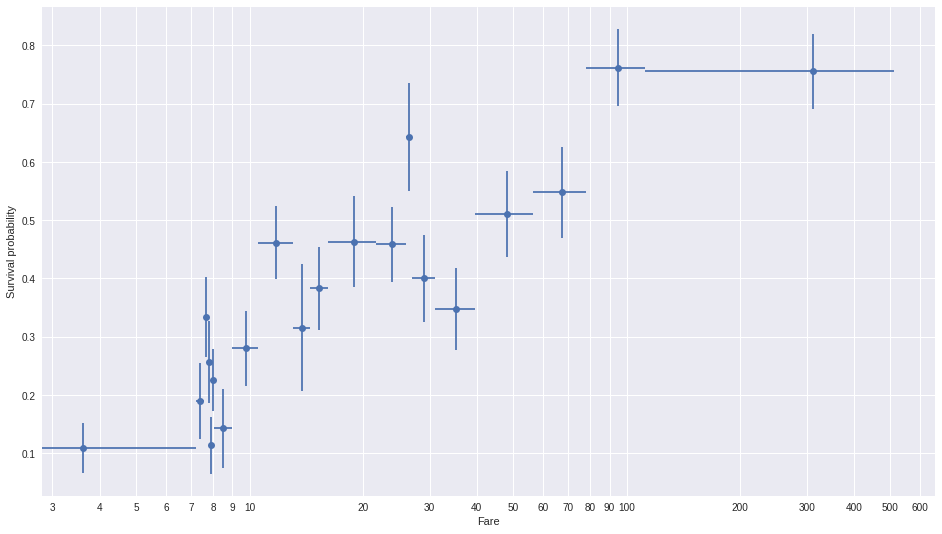

In [0]:
from matplotlib.ticker import ScalarFormatter

data['qFare'] = pd.qcut(data.Fare, 20)

sur_vs_price = data.groupby('qFare').Survived.mean()
sur_vs_price_e = data.groupby('qFare').Survived.std() \
                        / data.groupby('qFare').Survived.count()**0.5

fig = plt.figure(figsize=(16, 9))
plt.errorbar(x=np.round(pd.IntervalIndex(sur_vs_price.index).mid, decimals=2),
             y=sur_vs_price.values,
             yerr=sur_vs_price_e.values,
             xerr=(
                 pd.IntervalIndex(sur_vs_price.index).right - 
                 pd.IntervalIndex(sur_vs_price.index).left
               ) / 2,
             fmt='o')
plt.gca().set_xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().set_xticks(
              list(range(3, 10)) +
              list(range(10, 100, 10)) +
              list(range(100, 700, 100))
            )

plt.xlabel('Fare')
plt.ylabel('Survival probability');